In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_theme(style = 'whitegrid')

In [2]:
data = pd.read_csv('Fish.csv')
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Our data doesn't have null value

In [4]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


From the table above, we can see that we still have zero value in the Weight column

### Data Cleaning

In [5]:
data["Species"].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [6]:
#Find the zero value
data[(data['Weight'] == 0)]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


Since weight is usually affected by length, we'll replace the zero value with the closest Roach's length

In [7]:
#Filtering Data
data[(data['Species'] == 'Roach') & (data['Length1'] <= 20)]

,Species,Weight,Length1,Length2,Length3,Height,Width
35,Roach,40.0,12.9,14.1,16.2,4.1472,2.2680
36,Roach,69.0,16.5,18.2,20.3,5.2983,2.8217
37,Roach,78.0,17.5,18.8,21.2,5.5756,2.9044
38,Roach,87.0,18.2,19.8,22.2,5.6166,3.1746
39,Roach,120.0,18.6,20.0,22.2,6.2160,3.5742
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
41,Roach,110.0,19.1,20.8,23.1,6.1677,3.3957
42,Roach,120.0,19.4,21.0,23.7,6.1146,3.2943


In [8]:
#Replace the zero value
data.iloc[[40]] = data.iloc[[40]].replace({0.0 : 110.00})
data.iloc[[40]]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,110.0,19.0,20.5,22.8,6.4752,3.3516


### Data Exploration

In [9]:
data.groupby('Species').mean().round(2)

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,617.83,30.31,33.11,38.35,15.18,5.43
Parkki,154.82,18.73,20.35,22.79,8.96,3.22
Perch,382.24,25.74,27.89,29.57,7.86,4.75
Pike,718.71,42.48,45.48,48.72,7.71,5.09
Roach,157.55,20.64,22.28,24.97,6.69,3.66
Smelt,11.18,11.26,11.92,13.04,2.21,1.34
Whitefish,531.00,28.80,31.32,34.32,10.03,5.47


From the table above we can see that, from the **average weight** of all species Pike and Bream is commonly heavy arround 718gr and 617gr respectively and on the opposite Smelt is commonly light with weight arround 11gr

In [10]:
data[(data['Weight'] == data['Weight'].max()) | (data['Weight'] == data['Weight'].min())]

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.112,1.408
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


From our data, the heaviest species is Pike. Surprisingly the lightest one is from Perch species with a weight of only 5.9gr

### Data Visualization

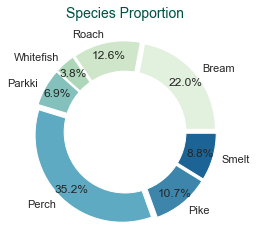

In [11]:
labels = ['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']
sizes = [data.Species[data['Species'] == 'Bream'].count(), data.Species[data['Species'] == 'Roach'].count(),
         data.Species[data['Species'] == 'Whitefish'].count(), data.Species[data['Species'] == 'Parkki'].count(),
         data.Species[data['Species'] == 'Perch'].count(), data.Species[data['Species'] == 'Pike'].count(),
         data.Species[data['Species'] == 'Smelt'].count()]
colors = ['#E2F0DE', '#CFE6CA', '#AED6B8', '#84C1BC', '#5EAAC2', '#3D85AB', '#1C6496']
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

plt.pie(sizes, labels = labels, colors = colors,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Species Proportion', size = 14, color = '#005142')
plt.show()

From our dataset, the species proportion is dominated by Perch and Bream species. We can assume that both fish have higher availability which means they are popular in the market

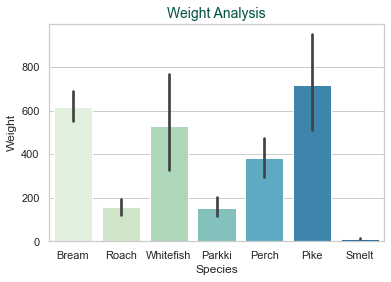

In [12]:
sns.barplot(x = 'Species', y = 'Weight', data = data, palette = 'GnBu')
plt.title('Weight Analysis', size = 14, color = '#005142')
plt.show()

The top 3 species with a heavier average weight are Pike, Bream, and Whitefish

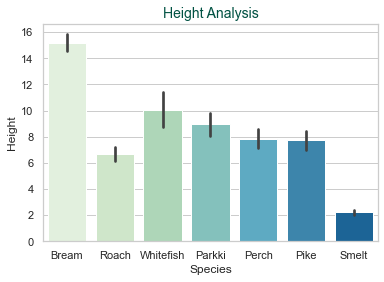

In [13]:
sns.barplot(x = 'Species', y = 'Height', data = data, palette = 'GnBu')
plt.title('Height Analysis', size = 14, color = '#005142')
plt.show()

From the average height of all the fish, we see that Bream is the tallest

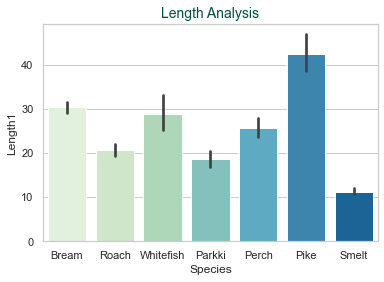

In [14]:
sns.barplot(x = 'Species', y = "Length1", data = data, palette = 'GnBu')
plt.title('Length Analysis', size = 14, color = '#005142')
plt.show()

From the average length of all the fish, we can see that again Pike, Bream, and Whitefish is in the top 3. Which means they are relatively long

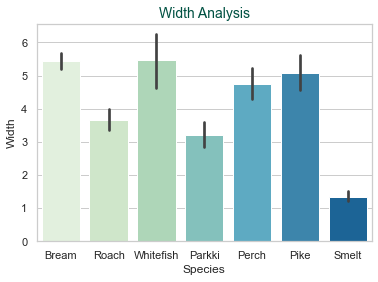

In [15]:
sns.barplot(x = 'Species', y = "Width", data = data, palette = 'GnBu')
plt.title('Width Analysis', size = 14, color = '#005142')
plt.show()

From the average width of all the fish, we can see that Whitefish and Bream is relatively wide

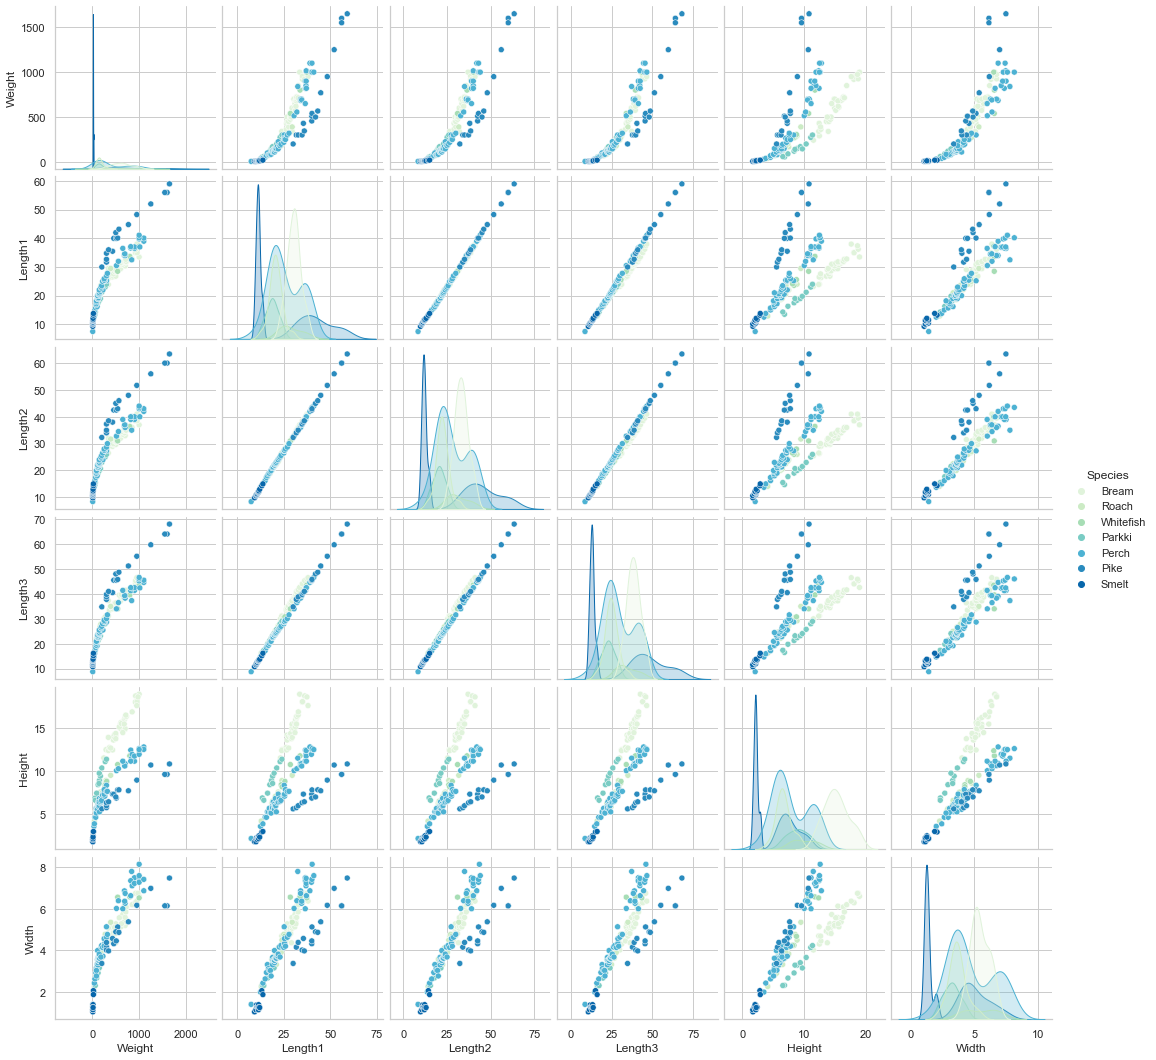

In [16]:
sns.pairplot(data, hue = 'Species', palette = 'GnBu')

In the above pairplot, we see a strong positive correlation

### Modeling

In [17]:
df = pd.get_dummies(data, columns = ['Species'])
df.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [38]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
x_train, x_test, y_train, y_test

(array([[56. , 60. , 64. , ...,  0. ,  0. ,  0. ],
        [32.7, 35. , 38.8, ...,  0. ,  0. ,  0. ],
        [30.4, 33. , 38.3, ...,  0. ,  0. ,  0. ],
        ...,
        [19. , 20.7, 23.2, ...,  0. ,  0. ,  0. ],
        [36.5, 39. , 41.4, ...,  0. ,  0. ,  0. ],
        [21.1, 22.5, 25. , ...,  1. ,  0. ,  0. ]]),
 array([[27.6   , 30.    , 35.    , 12.67  ,  4.69  ,  1.    ,  0.    ,
          0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
        [19.    , 20.5   , 22.8   ,  6.4752,  3.3516,  0.    ,  0.    ,
          0.    ,  0.    ,  1.    ,  0.    ,  0.    ],
        [21.5   , 23.5   , 25.    ,  6.275 ,  3.725 ,  0.    ,  0.    ,
          1.    ,  0.    ,  0.    ,  0.    ,  0.    ],
        [20.5   , 22.5   , 25.3   ,  7.0334,  3.8203,  0.    ,  0.    ,
          0.    ,  0.    ,  1.    ,  0.    ,  0.    ],
        [32.    , 34.5   , 36.5   , 10.2565,  6.3875,  0.    ,  0.    ,
          1.    ,  0.    ,  0.    ,  0.    ,  0.    ],
        [37.    , 40.    , 42.5   , 11.73  ,

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

ModuleNotFoundError: No module named 'catboost'

In [21]:
sc = ('Scaler', StandardScaler())
pipeline_lr = Pipeline([('LinearRegression', LinearRegression())])
pipeline_rf = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_knn = Pipeline([sc,('KNeighbors', KNeighborsRegressor())])
pipeline_dt = Pipeline([('DecisionTree', DecisionTreeRegressor())])
pipeline_et = Pipeline([('ExtraTrees', ExtraTreesRegressor())])
pipeline_cat = Pipeline([('CatBoost', CatBoostRegressor())])

NameError: name 'Pipeline' is not defined

In [22]:
pipelines = [pipeline_lr, pipeline_rf, pipeline_knn, pipeline_dt, pipeline_et, pipeline_cat]

NameError: name 'pipeline_lr' is not defined

In [23]:
best_score = 0.0
best_regressor = 0
best_pipeline = ""

In [24]:
pipe_dict = {0:'LinearRegression', 1:'RandomForest', 2:'KNeighbors', 3:'DecisionTree', 4:'ExtraTrees', 5:'CatBoost'}

for pipe in pipelines:
    pipe.fit(x_train,y_train)

NameError: name 'pipelines' is not defined

In [25]:
for i,model in enumerate (pipelines):
    print("{}, R2 Score: {}".format(pipe_dict[i],model.score(x_test,y_test)))

NameError: name 'pipelines' is not defined

In [26]:
for i, model in enumerate(pipelines):
    if model.score(x_test,y_test) > best_score:
        best_score = model.score(x_test,y_test)
        best_pipeline = model
        best_regressor = i

print('The best regressor is {} with R2 Score {}'.format(pipe_dict[best_regressor], best_score))

NameError: name 'pipelines' is not defined

R2 Score we got is high which means our model is fit pretty well

In [27]:
reg = ExtraTreesRegressor()
reg.fit(x_train, y_train)

ExtraTreesRegressor()

In [28]:
data.iloc[[1]]

,Species,Weight,Length1,Length2,Length3,Height,Width
1,Bream,290.0,24.0,26.3,31.2,12.48,4.3056


In [29]:
#Try our model by input value manually
reg.predict([[24.0, 26.3, 31.2, 12.4800, 4.3056, 1,0,0,0,0,0,0]])

array([290.])

Our model predict the right weight ;)

Text(0, 0.5, 'Target')

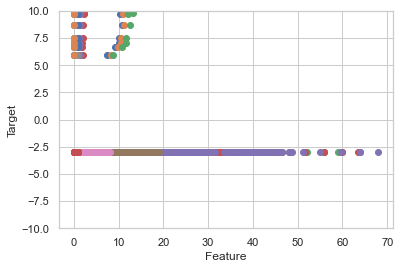

In [30]:
plt.plot(x, y, 'o')
plt.plot(x, -3 * np.ones(len(x)), 'o')
plt.ylim(-10, 10)
plt.xlabel("Feature")
plt.ylabel("Target")

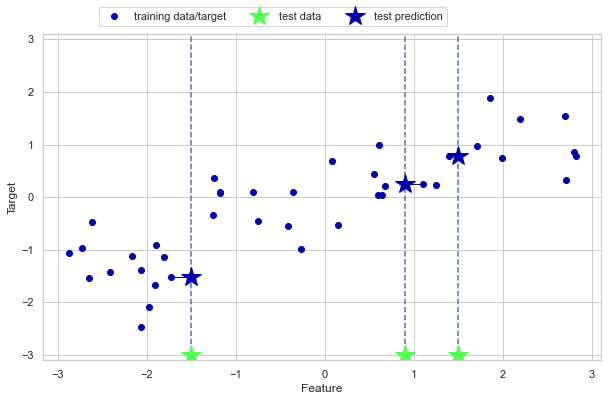

In [31]:
import mglearn
mglearn.plots.plot_knn_regression(n_neighbors=1)

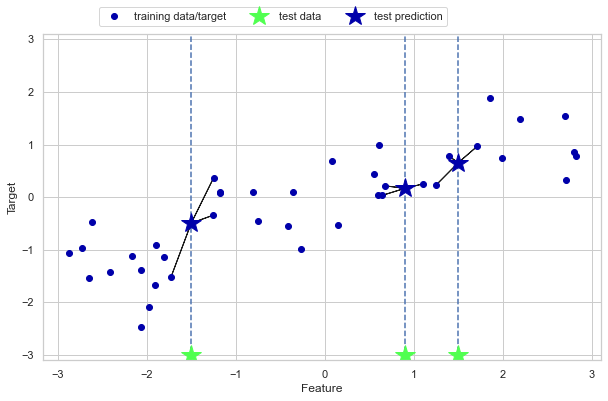

In [32]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
#get the average if many neighbors

In [33]:
#split for train and test data
from sklearn.neighbors import KNeighborsRegressor
#x, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0) #random state = reproducible and consistant
# Instantiate the model, set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# Fit the model using the training data and training targets:
reg.fit(x_train, y_train)
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
metric_params=None, n_jobs=1, n_neighbors=3, p=2,
weights='uniform')

KNeighborsRegressor(n_jobs=1, n_neighbors=3)

In [34]:
y

array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
        700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
        700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
        110. ,  110. ,  120. ,  150. ,  145. ,  160. ,  140. ,  160. ,
        169. ,  161. ,  200. ,  180. ,  290. ,  272. ,  390. ,  270. ,
        270. ,  306. ,  540. ,  800. , 1000. ,   55. ,   60. ,   90. ,
        120. ,  150. ,  140. ,  170. ,  145. ,  200. ,  273. ,  300. ,
          5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
      

In [35]:
reg.predict(x_test)

array([ 460.        ,  116.66666667,  146.66666667,  150.        ,
        679.66666667,  911.66666667,  691.66666667,  358.33333333,
        931.66666667,  115.        ,  378.        ,  516.66666667,
        885.        , 1033.33333333,   53.83333333,   80.33333333,
        150.        ,  990.        ,  121.66666667,  706.33333333,
         43.83333333,  458.        ,  126.66666667,  990.        ,
         96.33333333,  483.33333333,  706.33333333,  286.66666667,
        885.        ,    8.66666667,  628.33333333,  126.66666667,
        990.        ,  358.33333333,  636.66666667,  171.        ,
        273.33333333,  646.66666667,  691.66666667,  126.66666667])

In [36]:
reg.score(x_test, y_test)

0.8361275424701358

In [37]:
from sklearn.metrics import r2_score
r2_score(reg.predict(x_test), y_test)

0.7142388497841767